# Imports and methods

In [35]:
import pandas as pd
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings


def bar(data):
    sizes=np.sum(data,axis=0)
    label=['hand','forearm','arm','shoul','chest','abs','uback','lback']
    
    plt.bar(label, sizes,label='Men')
    plt.savefig('pie.png')
    plt.show()
    
def do_classify(X,y,Xtest,ytest):
    importance=[]
    scores=[]
    for i in range(100):
        clf = ExtraTreesClassifier(n_estimators=10)
        clf = clf.fit(X, y)
        scores.append(clf.score(Xtest,ytest))
        importance.append(clf.feature_importances_)  
    
    mean_importance=np.mean(importance,axis=0)
    mean_scores=np.mean(scores)
    return mean_importance,mean_scores
########################################################################################################
warnings.filterwarnings('ignore')
df=pd.read_csv('/home/jan/Desktop/workspace/Social_touch/transform_annotation/data.csv',sep=',')
df=df.drop(columns=['Unnamed: 0'])
######################################################################################################
data=df

# The social touch experiment protocol 

## Purpose

The purpose of this preliminary study is to model the relationship between touch events and the affective value (Valence/Arousal) that it holds in a social setting.<br>

First and foremost, we want to emphasis that this study will be limited to one-way interaction, rather than modeling the interaction as a dynamical system where two persons exchange touches, back and forth.<br>

In this experiment, participants will be asked to watch a specific set of videos from *(SATED)* that contains touch interactions, then, afterward, apply the same touch to a manikin, allowing us to collect data from the pressure sensor that are placed strategicaly on the manikin body.<br>

At the end, using the experimental data from the human-manikin interactions, our system should be able to predict the emotions that occur from a touch-receiver standpoint.  


## Protocol

<img src="proto.jpg" width="80%"> 

## Part 1: Annotation and analysis

Now that we have laid the foundation for our experiment, by defining a concise protocol. The only questions left unanswered are:
- Where the pressure sensors will be placed on the manikin and why ?
- What are the videos from the SATED (socio-affective touch database) we are going to show to the participants ?



### 1.1 The chosen videos !

The choice of a manikin as input device put heavy constraints on the number of videos (from SATED): only interactions that could be reproduced by participants on manikin are kept. Therefore, 24 videos were selected on this basis. 


#### Example.1: Reproducible video on manikin 

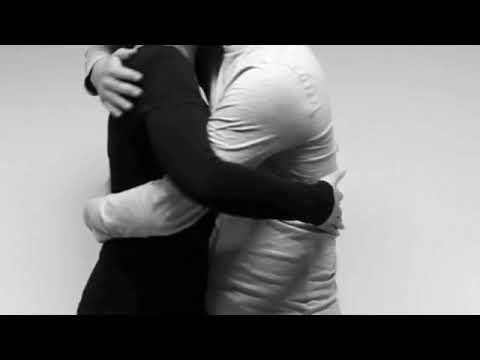

In [19]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('YauLKk_F-qI')

#### Example.2: Non reproducible video on manikin 

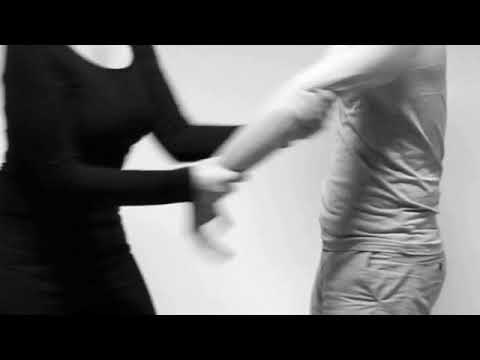

In [20]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('RslYK3jNUlw')

#### Summary table of selected videos

| Type          | Video_num          | Number        |
| ------------- |-------------  | -------------
| Hug           | 2,3,15,16,28,29          | 6
| Stroke        | 4,5,17,18,30,31                     | 6
| Tap           | 7,20,33           | 3
| Shake         | 8,9,21,22,34,35      | 6
| Slap          | 13,26         | 2



### 1.2  Sensors and manikin

There are many ways to place the sensors on the manikin. A wise choice, relies on choosing relevant manikin body part that suit the purpose of this study *Valence/Arousal/Action* classification.<br>

First, after watching all the videos, we noticed that some areas, are more involved than others which leads us to ask the question:<br> 
Is there a small subset of the manikin body where we could put sensors that could result in a good accuracy score regarding our classification model ?<br>

In order to back this claim we have conducted an online annotation sessions using google form, where participants indicates the activated body parts in an interaction.

Participants in the annotation session were given an incentive to avoid random answers: The participant whom annotation is  closest to the average of all participants annotationbs will be granted 25 euro. 

Data collected from this experiment will also serve as way to make distinction between: the perception of a touch(annotating after watching a video) and execution of a touch (touching a manikin after watching a video)

#### 1.2.1 Annotation form

<img src="annotform.png" width="40%"> 

| Number        | Name          |
| ------------- |-------------| 
| 0             | hand         | 
| 1             | forearm        | 
| 2             | arm           | 
| 3             | shoulder      | 
| 4             | chest         | 
| 5             | abs           | 
| 6             | lower leg     | 
| 7             | upper back    | 
| 8             | lower back    | 

<img src="body.jpg" width="40%"> 

#### 1.2.2 Exploratory data analysis on annotation data

(138, 26)  #videos and #attributes
########### touch action histogram ######################
['Shake' 'Slap' 'Stroke' 'Tap' 'hug']
Number of each action 


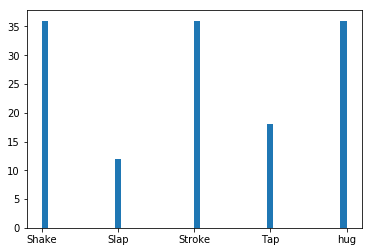

In [38]:
print(data.shape," #videos and #attributes")
print("########### touch action histogram ######################")
print(np.unique(data.iloc[:,-5]))
######################################### Action histogram #############################################################
plt.hist(data.iloc[:,-5],bins=50)
print("Number of each action ")

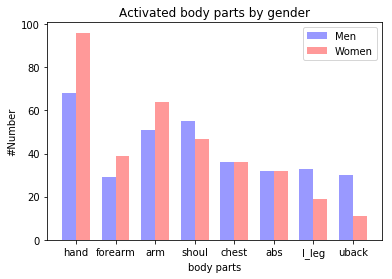

In [32]:
n_groups = 8
means_men = np.sum(data.iloc[:,0:8],axis=0)
means_women = np.sum(data.iloc[:,8:16],axis=0)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='Women')

ax.set_xlabel('body parts')
ax.set_ylabel('#Number')
ax.set_title('Activated body parts by gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['hand','forearm','arm','shoul','chest','abs','l_leg','uback','lback'])
ax.legend()

### Preprocessing data

In [46]:
X_women_touched=data[data.INITIATIVE_F==0]
X_women_touched.drop(X_women_touched.columns[8:16], axis=1, inplace=True)
X_women_touched.columns.values[0:8]=['T0','T1','T2','T3','T4','T5','T6','T7']
X_women_touched['sex_touched']=0

X_men_touched=data[data.INITIATIVE_F==1]
X_men_touched.drop(X_men_touched.columns[0:8], axis=1, inplace=True)
X_men_touched.columns.values[0:8]=['T0','T1','T2','T3','T4','T5','T6','T7']
X_men_touched['sex_touched']=1     
touched=pd.concat([X_women_touched,X_men_touched],axis=0,  ignore_index=True)   
X_touched=touched.iloc[:,0:8].values
########### action#############
y_action=touched.iloc[:,-6]
y_action=pd.get_dummies(y_action).values
y_action=np.argmax(y_action,axis=1)
################ Valence #####################
y_valence=touched.iloc[:,-4]
################### Arousal #####################
y_arousal=touched.iloc[:,-3]
###################  valence/arousal ###############################
y_va=touched.iloc[:,-4:-2].values
################# Motion energy ##################
y_ME=touched.iloc[:,-2]


### Activation data (touching==being touched)

In [37]:
data.head()

,F0,F1,F2,F3,F4,F5,F6,F7,M0,M1,...,NAME,VIDEO_NUM,Actors-Pair,INITIATIVE_F,INITIATIVE_M,ACTION,Stimulus,Valence,Arousal,Motion Energy
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Emmanuel,2,1,0,1,hug,2,7.931818,6.5,565545.5625
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,Aymane,2,1,0,1,hug,2,7.931818,6.5,565545.5625
2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Giuseppe,2,1,0,1,hug,2,7.931818,6.5,565545.5625
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Ayoub,2,1,0,1,hug,2,7.931818,6.5,565545.5625
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Frank,2,1,0,1,hug,2,7.931818,6.5,565545.5625


### Female touched data

In [39]:
X_women_touched.head()

,T0,T1,T2,T3,T4,T5,T6,T7,NAME,VIDEO_NUM,Actors-Pair,INITIATIVE_F,INITIATIVE_M,ACTION,Stimulus,Valence,Arousal,Motion Energy,sex_touched
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,Emmanuel,2,1,0,1,hug,2,7.931818,6.5,565545.5625,0
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,Aymane,2,1,0,1,hug,2,7.931818,6.5,565545.5625,0
2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,Giuseppe,2,1,0,1,hug,2,7.931818,6.5,565545.5625,0
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,Ayoub,2,1,0,1,hug,2,7.931818,6.5,565545.5625,0
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,Frank,2,1,0,1,hug,2,7.931818,6.5,565545.5625,0


### Male touched data 

In [40]:
X_men_touched.head()

,T0,T1,T2,T3,T4,T5,T6,T7,NAME,VIDEO_NUM,Actors-Pair,INITIATIVE_F,INITIATIVE_M,ACTION,Stimulus,Valence,Arousal,Motion Energy,sex_touched
12,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Emmanuel,4,1,1,0,Stroke,4,7.454545,5.931818,424614.3125,1
13,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,Aymane,4,1,1,0,Stroke,4,7.454545,5.931818,424614.3125,1
14,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,Giuseppe,4,1,1,0,Stroke,4,7.454545,5.931818,424614.3125,1
15,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Ayoub,4,1,1,0,Stroke,4,7.454545,5.931818,424614.3125,1
16,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Frank,4,1,1,0,Stroke,4,7.454545,5.931818,424614.3125,1


### Mixing both female and male data

In [53]:
print('############# Area that being touched #################')
print(X_touched)
print('#############Action #################')
print(y_action[:10])
print('#############Valence #################')
print(y_valence[:10])
print('#############Arousal #################')
print(y_arousal[:10])
print('#############Motion-Energy #################')
print(y_ME[:10])

############# Area that being touched #################
[[1. 0. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
#############Action #################
[4 4 4 4 4 4 4 4 4 4]
#############Valence #################
0    7.931818
1    7.931818
2    7.931818
3    7.931818
4    7.931818
5    7.931818
6    7.409091
7    7.409091
8    7.409091
9    7.409091
Name: Valence, dtype: float64
#############Arousal #################
0    6.500000
1    6.500000
2    6.500000
3    6.500000
4    6.500000
5    6.500000
6    5.977273
7    5.977273
8    5.977273
9    5.977273
Name: Arousal, dtype: float64
#############Motion-Energy #################
0    565545.5625
1    565545.5625
2    565545.5625
3    565545.5625
4    565545.5625
5    565545.5625
6    812516.9375
7    812516.9375
8    812516.9375
9    812516.9375
Name: Motion Energy, dtype: float64


### Classification and manikin zones importance

#### Touch-zones ------> Action

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X_touched, np.round(y_action), test_size=0.33, random_state=42)

mean_importance_action,mean_scores_action=do_classify(X_train,y_train,X_test,y_test)
print('#############  Accuracy of the classifier for touch_zones---->actions',mean_scores_action)


#############  Accuracy of the classifier for touch_zones---->actions 0.8043478260869567


#### Touch-zones ------> Valence

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X_touched, np.round(y_valence), test_size=0.33, random_state=42)

mean_importance_valence,mean_scores_valence=do_classify(X_train,y_train,X_test,y_test)
print('#############  Accuracy of the classifier for touch_zones---->Valence',mean_scores_valence)


#############  Accuracy of the classifier for touch_zones---->Valence 0.6304347826086957


#### Touch-zones ------> Arousal

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X_touched, np.round(y_arousal), test_size=0.33, random_state=42)

mean_importance_arousal,mean_scores_arousal=do_classify(X_train,y_train,X_test,y_test)
print('#############  Accuracy of the classifier for touch_zones---->arousal',mean_scores_valence)


#############  Accuracy of the classifier for touch_zones---->arousal 0.6304347826086957


#### Zones importance for Action classification

<Container object of 8 artists>

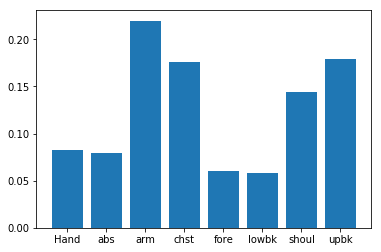

In [80]:
zones=['Hand','fore','arm','shoul','chst','abs','upbk','lowbk']
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(zones, mean_importance_action)



#### Zones importance for Valence classification

<Container object of 8 artists>

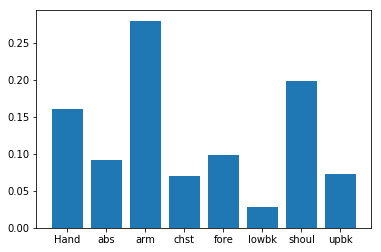

In [81]:
zones=['Hand','fore','arm','shoul','chst','abs','upbk','lowbk']
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(zones, mean_importance_valence)



#### Zones importance for Arousal classification

<Container object of 8 artists>

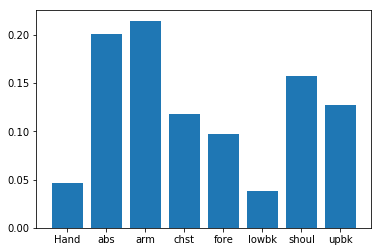

In [82]:
zones=['Hand','fore','arm','shoul','chst','abs','upbk','lowbk']
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(zones, mean_importance_arousal)



### Motion-Energy and classification

#### ME-----> Action

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    y_ME.reshape(-1,1), np.round(y_action), test_size=0.33, random_state=42)
mean_importance_action,mean_scores_action=do_classify(X_train,y_train,X_test,y_test)
print('#############  Accuracy of the classifier for ME------>actions(hug,slap,...)',mean_scores_action)
      

#############  Accuracy of the classifier for ME------>actions(hug,slap,...) 1.0


#### ME------->Valence

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    y_ME.reshape(-1,1), np.round(y_valence), test_size=0.33, random_state=42)
mean_importance_valence,mean_scores_valence=do_classify(X_train,y_train,X_test,y_test)
print('#############  Accuracy of the classifier for ME------> Valence ',mean_scores_valence)

#############  Accuracy of the classifier for ME------> Valence  1.0


#### ME-------->Arousal

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    y_ME.reshape(-1,1), np.round(y_arousal), test_size=0.33, random_state=42)
mean_importance_arousal,mean_scores_arousal=do_classify(X_train,y_train,X_test,y_test)
print('#############  Accuracy of the classifier for ME------>Arousal',mean_scores_arousal)

#############  Accuracy of the classifier for ME------>Arousal 1.0
